In [1]:
print("ram")

ram


In [6]:
from typing import TypedDict

class Movie(TypedDict):
    title: str
    year: int
    rating: float

movie = Movie(title="Inception", year="201s0", rating=8.8)
print(movie)

{'title': 'Inception', 'year': '201s0', 'rating': 8.8}


In [5]:
type(movie)

dict

In [2]:
from typing import Optional

def nice_message(name: Optional[str] = None) -> str:
    if name is None:
        return "Hello, World!"
    else:
        return f"Hello, {name}!"
    
print(nice_message(2))
print(nice_message("Alice"))
print(nice_message(name="Bob"))
print(nice_message(name=None))

Hello, 2!
Hello, Alice!
Hello, Bob!
Hello, World!


In [3]:
from typing import Any

def print_anything(value: Any) -> None:
    print(f"The value is: {value}")

print_anything(42)

The value is: 42


In [4]:
square = lambda x: x * x
print(square(5))

25


In [5]:
nums = [1, 2, 3, 4, 5]
squared_nums = list(map(lambda x: x * x, nums))
print(squared_nums)

[1, 4, 9, 16, 25]


## Agent 1

In [6]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [7]:
class AgentState(TypedDict):
    message : str

def greeting_node(state: AgentState) -> AgentState:
    '''Simple node that adds greeting message to the state '''
    state['message'] = "Hey " + state['message'] + " , how are you?"

    return state 

In [13]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

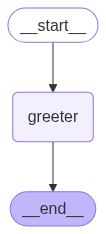

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
result = app.invoke({'message': "Ram"})
result

{'message': 'Hey Ram , how are you?'}

In [17]:
type(result)

dict

## Agent 2

In [18]:
from typing import List

class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [23]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""

    state['result'] = f'Hi there {state["name"]}! Your sum = {sum(state['values'])}'
    return state

In [24]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

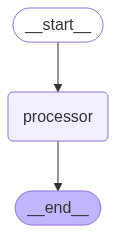

In [21]:
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
answer = app.invoke({"values": [1,2,3,4], "name": "Ram"})
answer

{'values': [1, 2, 3, 4],
 'name': 'Ram',
 'result': 'Hi there Ram! Your sum = 10'}

### Exercise 2

In [26]:
import math
class AgentState(TypedDict):
    name : str
    values : List[int]
    operation : str
    result : str


def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    
    if state['operation'] == '+':
        state['result'] = f"Hi {state['name']}, your answer is: {sum(state['values'])}"
    
    elif state['operation'] == '*':
        state['result'] = f"Hi {state['name']}, your answer is: {math.prod(state['values'])}"

    else:
        state['result'] = 'Invalid!'

    return state

In [27]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

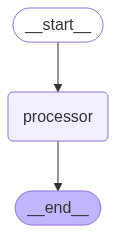

In [28]:
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
answers = app.invoke({"name": "Jack Sparrow","values": [1,2,3,4] , "operation": "0"})
answers

{'name': 'Jack Sparrow',
 'values': [1, 2, 3, 4],
 'operation': '0',
 'result': 'Invalid!'}

## Agent 3

In [33]:
class AgentState(TypedDict):
    name: str
    age : str
    final : str

In [38]:
def first_node(state: AgentState) -> AgentState:
    """This is the first node of the Sequence"""

    state['final'] = f"Hi {state['name']}"

    return state

def second_node(state: AgentState) -> AgentState:
    """This is the second node of the Sequence"""

    state['final'] = state['final'] + f" You are {state['age']} years old!"

    return state

In [40]:
graph = StateGraph(AgentState)

graph.add_node("first_node",first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app = graph.compile()

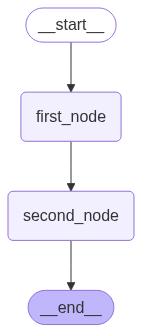

In [36]:
display(Image(app.get_graph().draw_mermaid_png()))

In [43]:
result = app.invoke({"name": "Man", "age": 20})
result

{'name': 'Man', 'age': 20, 'final': 'Hi Man You are 20 years old!'}

### Exercise 3

In [45]:
class AgentState(TypedDict):
    name: str
    age : str
    skills : List[str]
    result : str

def first_node(state: AgentState) -> AgentState:
    """This is the first node of the Sequence"""

    state['result'] = f"{state['name']} welcome to the system!"

    return state

def second_node(state: AgentState) -> AgentState:
    """This is the second node of the Sequence"""

    state['result'] = state['result'] + f" You are {state['age']} years old!"

    return state

def third_node(state: AgentState) -> AgentState:
    """This is the third node of the Sequence"""

    state['result'] = state['result'] + f" You have skills in: {", ".join(state["skills"])}"

    return state

In [48]:
graph = StateGraph(AgentState)

graph.add_node("personalize", first_node)
graph.add_node("age_description", second_node)
graph.add_node("skills_description", third_node)

graph.set_entry_point("personalize")
graph.add_edge("personalize", "age_description")
graph.add_edge("age_description", "skills_description")
graph.set_finish_point("skills_description")

app = graph.compile()

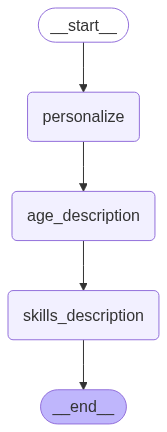

In [49]:
display(Image(app.get_graph().draw_mermaid_png()))

In [50]:
result = app.invoke({"name": "Linda", "age": 31, "skills":["Python", "Machine Learning", "LangGraph"]})
result

{'name': 'Linda',
 'age': 31,
 'skills': ['Python', 'Machine Learning', 'LangGraph'],
 'result': 'Linda welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, LangGraph'}

## Agent 4

In [103]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    finalNumber: int

In [104]:
def adder(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""

    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""

    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state['operation'] == '+':
        return "addition_operation"
    
    elif state['operation'] == '-':
        return "subtraction_operation"

In [105]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation" : "add_node",
        "subtraction_operation" : "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

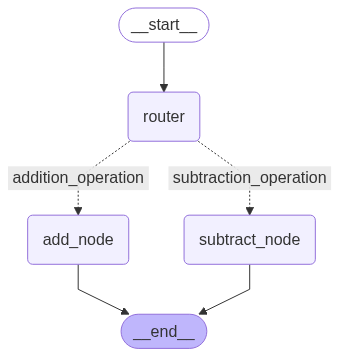

In [106]:
display(Image(app.get_graph().draw_mermaid_png()))

In [107]:
initial_state_1 = AgentState(number1 = 10, operation="-", number2 = 5)
print(app.invoke(initial_state_1))

{'number1': 10, 'number2': 5, 'operation': '-', 'finalNumber': 5}


In [57]:
result = app.invoke({"number1": 10, "operation": "-", "number2": 5})
print(result)

{'number1': 10, 'number2': 5, 'operation': '-', 'finalNumber': 5}


### Exercise 4

In [108]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    number3: int
    number4: int
    operation2: str
    finalNumber: int
    finalNumber2: int

In [ ]:
def adder(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""

    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""

    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state['operation'] == '+':
        return "addition_operation"
    
    elif state['operation'] == '-':
        return "subtraction_operation"
    

def adder2(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""

    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtractor2(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""

    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_next_node2(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state['operation2'] == '+':
        return "addition_operation2"
    
    elif state['operation2'] == '-':
        return "subtraction_operation2"

In [116]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state)

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation" : "add_node",
        "subtraction_operation" : "subtract_node"
    }
)

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2" : "add_node2",
        "subtraction_operation2" : "subtract_node2"
    }
)

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

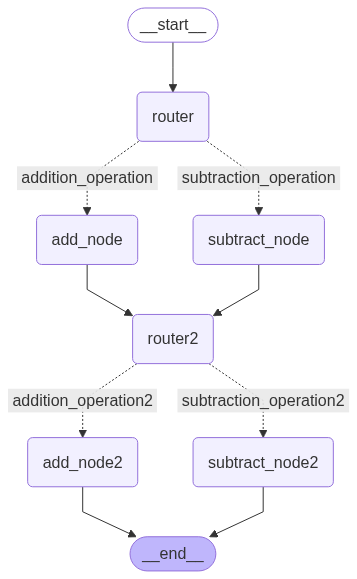

In [117]:
display(Image(app.get_graph().draw_mermaid_png()))

In [118]:
initial_state = AgentState(number1 = 10, number2 = 5, operation="-", number3 = 7, number4=2, operation2="+", finalNumber1= 0, finalNumber2 = 0)
initial_state

{'number1': 10,
 'number2': 5,
 'operation': '-',
 'number3': 7,
 'number4': 2,
 'operation2': '+',
 'finalNumber1': 0,
 'finalNumber2': 0}

In [119]:
print(app.invoke(initial_state))

{'number1': 10, 'number2': 5, 'operation': '-', 'number3': 7, 'number4': 2, 'operation2': '+', 'finalNumber': 5, 'finalNumber2': 9}


## Agent 5

In [120]:
from langgraph.graph import StateGraph, START, END
from typing import Dict, List, TypedDict
import random

In [121]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [126]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state['name'] = f'Hi there, {state['name']}'
    state['counter'] = 0

    return state

def random_node(state: AgentState) -> AgentState:
    "Generates a random number from 0 to 10"
    state['number'].append(random.randint(0, 10))
    state['counter'] += 1

    return state

def should_continue(state: AgentState) -> AgentState:
    "Function to decide what to do next"
    if state['counter'] < 5:
        print("ENTERING LOOP: ", state['counter'])
        return "loop"
    else:
        return "exit"

In [129]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")

graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop": "random",
        "exit": END
    }
)

graph.set_entry_point("greeting")
app = graph.compile()

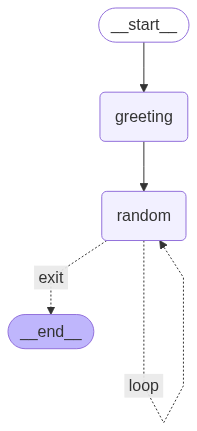

In [130]:
display(Image(app.get_graph().draw_mermaid_png()))

In [132]:
app.invoke({"name": "Bhai", "number": []})

ENTERING LOOP:  1
ENTERING LOOP:  2
ENTERING LOOP:  3
ENTERING LOOP:  4


{'name': 'Hi there, Bhai', 'number': [10, 3, 3, 6, 7], 'counter': 5}

### Exercise 5

In [144]:
class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    hint: str
    target_number: int


In [156]:
def setup_node(state: AgentState) -> AgentState:
    """Intilize the game with a random target number"""
    state['player_name'] = f'Welcome, {state['player_name']}'
    state['guesses'] = []
    state['attempts'] = 0
    state['lower_bound'] = 1
    state['upper_bound'] = 20
    state['hint'] = "Game Started! Try to guess the number"
    state['target_number'] = random.randint(1, 20)

    return state

def guess_node(state: AgentState) -> AgentState:
    """Generate a smarter guess based on previous hints"""
    possible_guesses = [i for i in range(state["lower_bound"], state["upper_bound"] + 1) if i not in state["guesses"]]
    
    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:
        guess = random.randint(state['lower_bound'], state['upper_bound'])

    state["guesses"].append(guess)
    state["attempts"] += 1
    print(f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']}-{state['upper_bound']})")

    return state

def hint_node(state: AgentState) -> AgentState:
    """Here we provide a hint based on the last guess and update the bounds"""
    
    latest_guess = state['guesses'][-1]
    target = state['target_number']

    if latest_guess < target:
        state["hint"] = f"The number {latest_guess} is too low. Try higher!"
        state["lower_bound"] = max(state["lower_bound"], latest_guess + 1)
        print(f"Hint: {state['hint']}")
    
    elif latest_guess > target:
        state["hint"] = f"The number {latest_guess} is too high. Try lower!"
        state["upper_bound"] = min(state["upper_bound"], latest_guess - 1)
        print(f"Hint: {state['hint']}")
    else:
        state["hint"] = f"Correct! You found the number {target} in {state['attempts']} attempts."
        print(f"Success! {state['hint']}")
    
    return state

def should_continue(state: AgentState) -> str:
    """Determine if we should continue guessing or end the game"""

    latest_guess = state['guesses'][-1]
    if latest_guess == state['target_number']:
        print(f"GAME OVER: Number found!")
        return "end" 
    
    elif state["attempts"] >= 7:
        print(f"GAME OVER: Maximum attempts reached! The number was {state['target_number']}")
        return "end"
    else:
        print(f"CONTINUING: {state['attempts']}/7 attempts used")
        return "continue"

In [157]:
graph = StateGraph(AgentState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint", hint_node)

graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")

graph.add_conditional_edges(
    "hint",
    should_continue,
    {
        "continue": "guess",
        "end": END
    }
)

graph.set_entry_point("setup")
app = graph.compile()

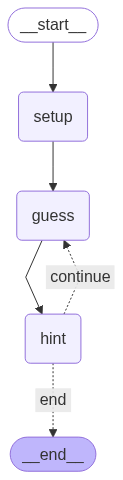

In [158]:
display(Image(app.get_graph().draw_mermaid_png()))

In [159]:
result = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})

Attempt 1: Guessing 3 (Current range: 1-20)
Hint: The number 3 is too low. Try higher!
CONTINUING: 1/7 attempts used
Attempt 2: Guessing 19 (Current range: 4-20)
Hint: The number 19 is too high. Try lower!
CONTINUING: 2/7 attempts used
Attempt 3: Guessing 16 (Current range: 4-18)
Hint: The number 16 is too low. Try higher!
CONTINUING: 3/7 attempts used
Attempt 4: Guessing 18 (Current range: 17-18)
Hint: The number 18 is too high. Try lower!
CONTINUING: 4/7 attempts used
Attempt 5: Guessing 17 (Current range: 17-17)
Success! Correct! You found the number 17 in 5 attempts.
GAME OVER: Number found!
